In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [17]:
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv("data.csv")
df = df.drop(['Unnamed: 32', 'id'], axis=1)

#encoding the the target feature
df['diagnosis']= df['diagnosis'].replace('M', 1)
df['diagnosis']= df['diagnosis'].replace('B', 0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


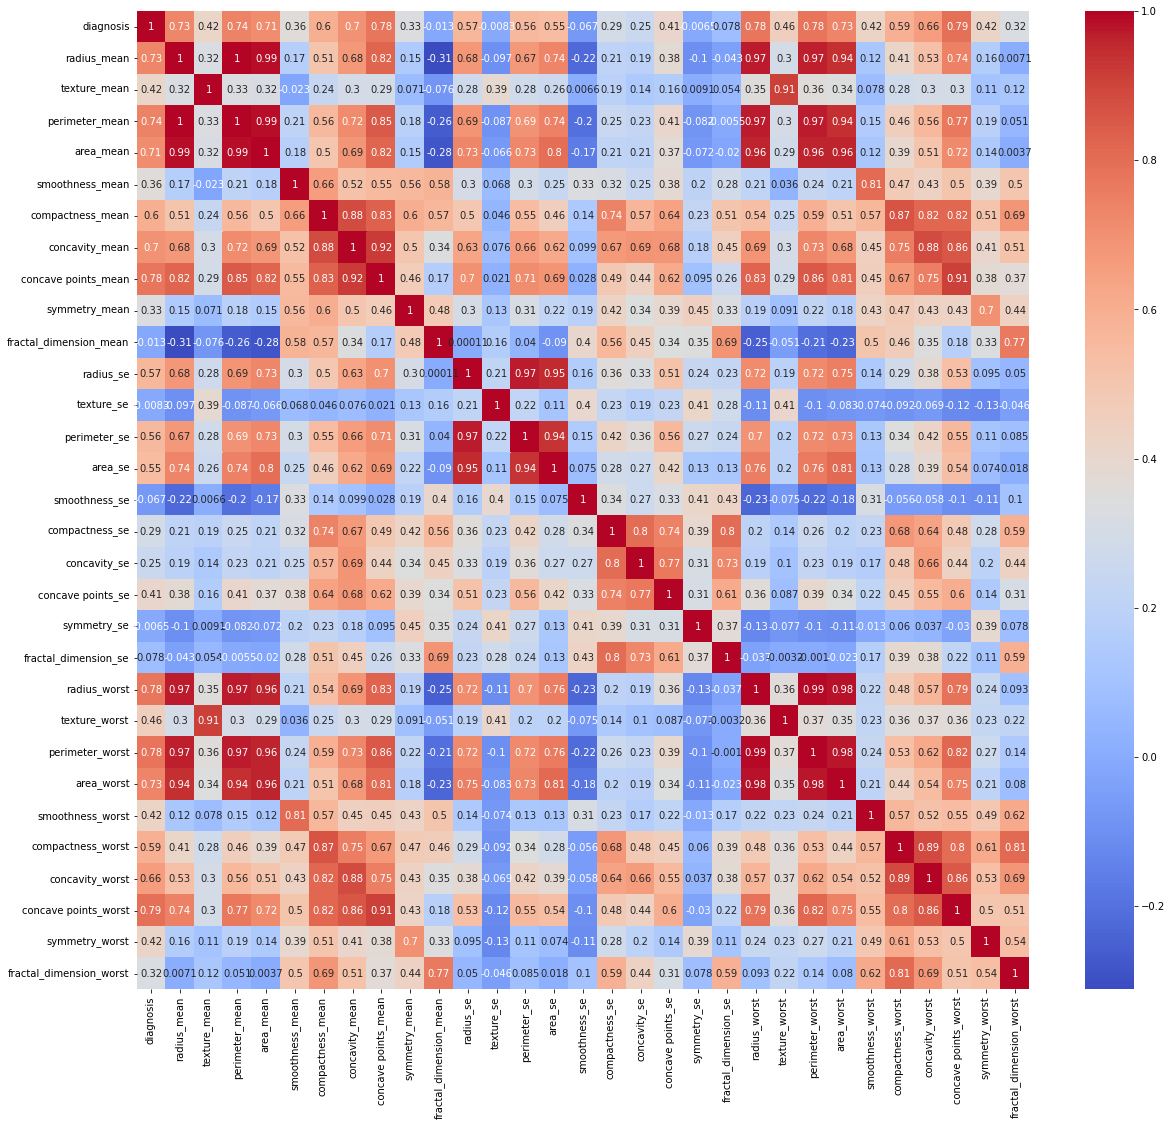

In [3]:
corr = df.corr()
plt.figure(figsize=(20,18))
sns.heatmap(corr, cmap='coolwarm', annot = True)
plt.show()


In [4]:
acc=df[df.columns[:]].corr()['diagnosis']
print('All features  with thier correlations is: \n',acc)

All features  with thier correlations is: 
 diagnosis                  1.000000
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst   

In [5]:
#finding out the positively corelated feature
cc=corr[abs(corr['diagnosis']) > 0.5].index
print('- Number of most correlated features = ', len(cc))
print('--------------------------------------------------')
print('- Most correlated features is: \n ',cc)

- Number of most correlated features =  16
--------------------------------------------------
- Most correlated features is: 
  Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_se', 'perimeter_se', 'area_se', 'radius_worst',
       'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')


In [6]:
#finding out the negatively corelated feature
cc2=corr[abs(corr['diagnosis']) <= 0.5].index
print('- Number of Least correlated features = ', len(cc2))
print('--------------------------------------------------')
print('- Least correlated features is: \n ',cc2)

- Number of Least correlated features =  15
--------------------------------------------------
- Least correlated features is: 
  Index(['texture_mean', 'smoothness_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'smoothness_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [7]:
df_cor = df.drop(["radius_mean", "perimeter_mean", "area_mean", "radius_worst", "perimeter_worst"], axis=1)
df_cor.head()


,diagnosis,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,...,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,...,0.01389,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,...,0.02250,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,...,0.05963,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,...,0.01756,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df_20 = df[[   'diagnosis', 'perimeter_worst', 'concave points_worst','texture_mean', 
            'smoothness_mean', 'symmetry_mean', 'texture_worst', 'smoothness_worst',
            'radius_mean', 'area_mean',
            'compactness_mean', 'concavity_mean', 'concave points_mean',
            'area_worst', 'compactness_worst',
            'concavity_worst', 'area_se','fractal_dimension_se',
            'symmetry_worst', 'fractal_dimension_worst'
         ]].copy()
df_20.head()

,diagnosis,perimeter_worst,concave points_worst,texture_mean,smoothness_mean,symmetry_mean,texture_worst,smoothness_worst,radius_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,area_worst,compactness_worst,concavity_worst,area_se,fractal_dimension_se,symmetry_worst,fractal_dimension_worst
0,1,184.60,0.2654,10.38,0.11840,0.2419,17.33,0.1622,17.99,1001.0,0.27760,0.3001,0.14710,2019.0,0.6656,0.7119,153.40,0.006193,0.4601,0.11890
1,1,158.80,0.1860,17.77,0.08474,0.1812,23.41,0.1238,20.57,1326.0,0.07864,0.0869,0.07017,1956.0,0.1866,0.2416,74.08,0.003532,0.2750,0.08902
2,1,152.50,0.2430,21.25,0.10960,0.2069,25.53,0.1444,19.69,1203.0,0.15990,0.1974,0.12790,1709.0,0.4245,0.4504,94.03,0.004571,0.3613,0.08758
3,1,98.87,0.2575,20.38,0.14250,0.2597,26.50,0.2098,11.42,386.1,0.28390,0.2414,0.10520,567.7,0.8663,0.6869,27.23,0.009208,0.6638,0.17300
4,1,152.20,0.1625,14.34,0.10030,0.1809,16.67,0.1374,20.29,1297.0,0.13280,0.1980,0.10430,1575.0,0.2050,0.4000,94.44,0.005115,0.2364,0.07678


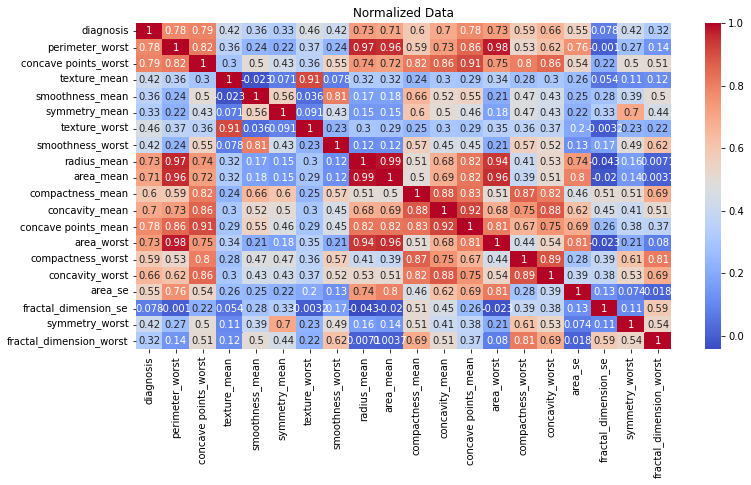

In [9]:
#plotting the corellation matrix
corr = df_20.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr, cmap='coolwarm', annot = True)
plt.title("Normalized Data")
plt.show()

In [15]:
#dividing the dataframe into training and target features
x = df_20.drop(['diagnosis'], axis=1)
y = df_20['diagnosis']

#splitting the dataframe and keeping 80% of the data for training and rest 20% for testing
X_train20, X_test20, y_train20, y_test20 = train_test_split(x, y, test_size=0.2, random_state=42, stratify = y)
# print(len(y_train))
sc = StandardScaler()
X_train = sc.fit_transform(X_train20)
X_test = sc.transform(X_test20)


In [11]:
def display_cm(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(cm).plot()
    return cm_display



In [20]:
def find_scores(X_train, y_train):
    classifiers = []
    scores = []

    # Percepltron learning algorithm
    perceptron_classifier = Perceptron()
    perceptron_score = round(np.mean(cross_val_score(perceptron_classifier, X_train, y=y_train, scoring='f1_micro', cv=10))*100,2)
    scores.append(perceptron_score)
    classifiers.append(perceptron_classifier)

    # logistic regression
    log_reg_classifier = LogisticRegression()
    log_reg_score = round(np.mean(cross_val_score(log_reg_classifier, X_train, y=y_train, scoring='f1_micro', cv=10))*100,2)
    scores.append(log_reg_score)
    classifiers.append(log_reg_classifier)

    # SVM linear model
    svm_lin_classifier = SVC(kernel = 'linear', random_state = 0)
    svm_lin_score = round(np.mean(cross_val_score(svm_lin_classifier, X_train, y=y_train, scoring='f1_micro', cv=10))*100,2)
    scores.append(svm_lin_score)
    classifiers.append(svm_lin_classifier)

    # RBF svm model
    rbf_svm_classifier = SVC(kernel = 'rbf', random_state = 0)
    rbf_svm_score = round(np.mean(cross_val_score(rbf_svm_classifier, X_train, y=y_train, scoring='f1_micro', cv=10))*100,2)
    scores.append(rbf_svm_score)
    classifiers.append(rbf_svm_classifier)

    # Decision tree classifier
    dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    dt_score = round(np.mean(cross_val_score(dt_classifier, X_train, y=y_train, scoring='f1_micro', cv=10))*100,2)
    scores.append(dt_score)
    classifiers.append(dt_classifier)
    return scores, classifiers

scores_20, clfs_20 = find_scores(X_train20, y_train20)

In [21]:
scores_20

[82.44, 94.92, 95.8, 91.41, 92.72]

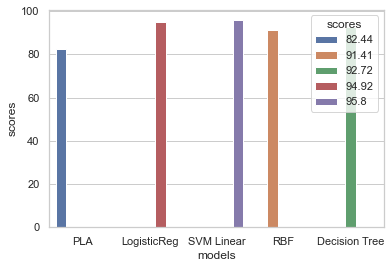

In [19]:
models = ["PLA", "LogisticReg", "SVM Linear", "RBF", "Decision Tree"]
sns.set_theme(style="whitegrid")
df = pd.DataFrame({'models': models, 'scores': scores_20})
ax = sns.barplot(x="models", y="scores", data=df, hue="scores")